
# Quantum Optics (and beyond)
## Fanaten Presentation November 2023 - Part 1

#### Part 1 of this presentation can be found at https://robhendrik.github.io/Fanaten2023/

#### Part 2 of this presentation can be found at https://robhendrik.github.io/superquantum/

![Alt text](Slide3.JPG)

In [2]:
import sys  
sys.path.append("../src") # path to directory for modules fock_state_circuit.py and collection_of_states.py
import fock_state_circuit as fsc
import collection_of_states as cos
import importlib
import math
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

<a id='FSC'></a>
## FockStateCircuit

![Alt text](Slide4.JPG)

![Alt text](Slide5.JPG)

![Alt text](Slide6.JPG)

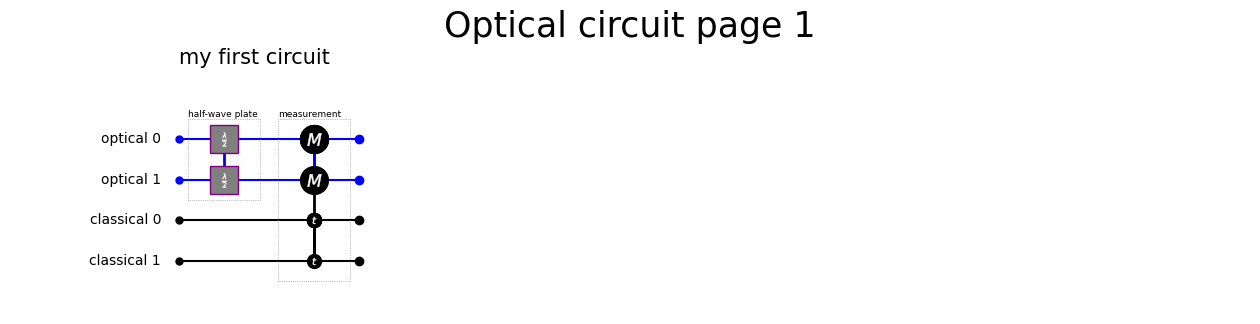

In [18]:
circuit = fsc.FockStateCircuit(length_of_fock_state = 2, 
                                no_of_optical_channels = 2,
                                no_of_classical_channels=2,
                                circuit_name = "my first circuit"
                                )
circuit.half_wave_plate_45(channel_horizontal=0, channel_vertical=1)
circuit.measure_optical_to_classical(optical_channels_to_be_measured=[0,1], classical_channels_to_be_written=[0,1])
circuit.draw()

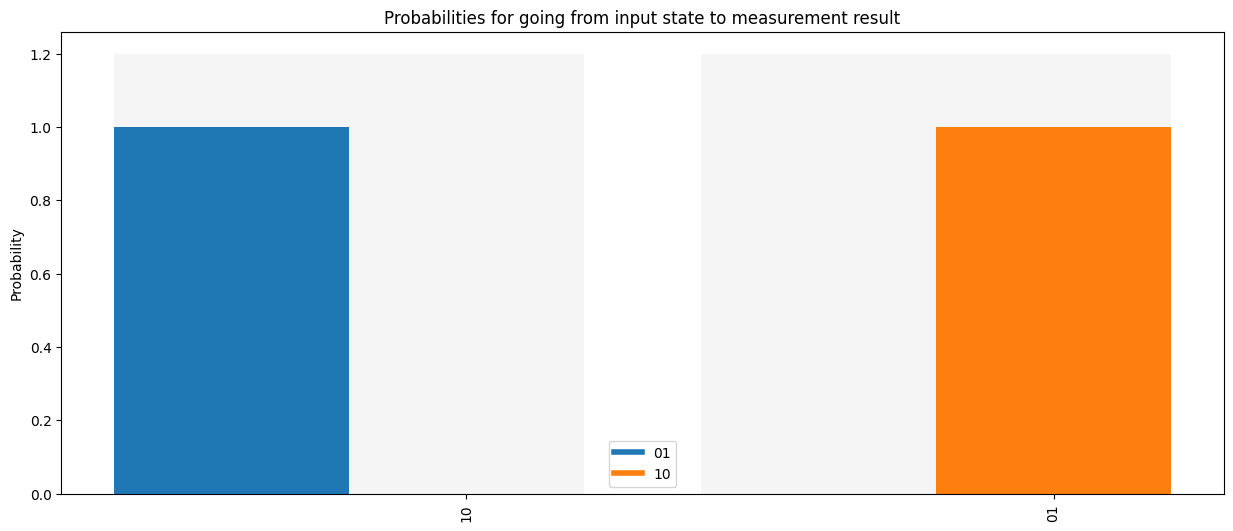

In [19]:
initial_collection_of_states = cos.CollectionOfStates(fock_state_circuit=circuit)

result = circuit.evaluate_circuit(collection_of_states_input=initial_collection_of_states)

result.filter_on_initial_state(initial_state_to_filter=['01','10'])

result.plot()

![Alt text](Slide7.JPG)

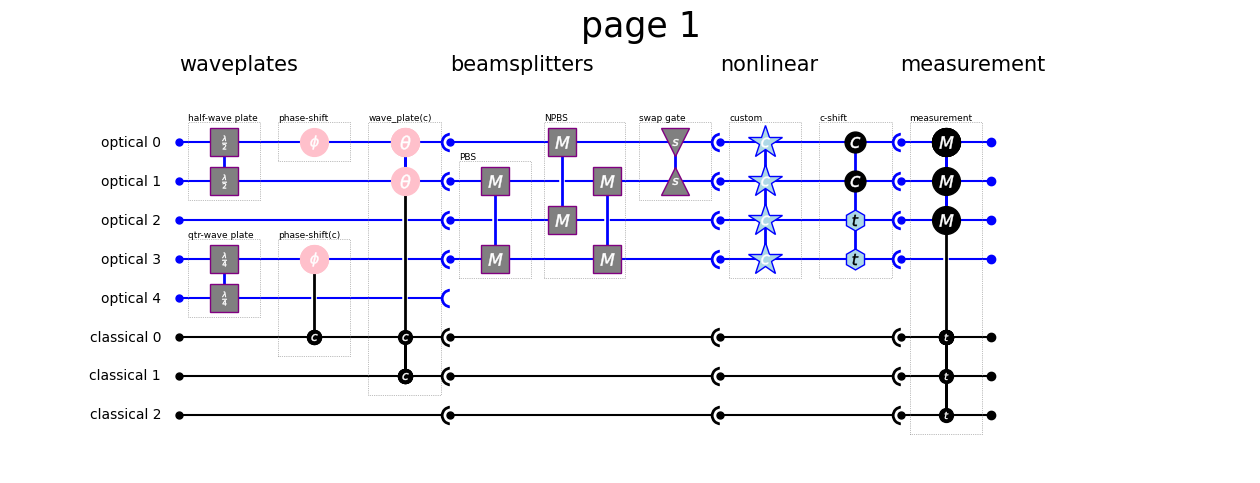

In [20]:
circuit_draw_settings = {
            'compound_circuit_title' : ' '
}

circuit1 = fsc.FockStateCircuit(length_of_fock_state = 2, 
                                no_of_optical_channels = 5, 
                                no_of_classical_channels=3,
                                circuit_name='waveplates'
                                )
circuit1.half_wave_plate(channel_horizontal=0,channel_vertical=1, angle=0)
circuit1.quarter_wave_plate(channel_horizontal=3,channel_vertical=4, angle=0)
circuit1.phase_shift_single_channel(channel_for_shift=0,phase_shift=0)
circuit1.phase_shift_single_channel_classical_control(optical_channel_to_shift=3,classical_channel_for_phase_shift=0)
circuit1.wave_plate_classical_control(optical_channel_horizontal=0,optical_channel_vertical=1, classical_channel_for_orientation=0,classical_channel_for_phase_shift=1)


circuit2 = fsc.FockStateCircuit(length_of_fock_state = 2, 
                                no_of_optical_channels = 4, 
                                no_of_classical_channels=3,
                                circuit_name='beamsplitters'
                                )
circuit1.bridge(next_fock_state_circuit=circuit2)
circuit2.polarizing_beamsplitter(input_channels_a=(0,1), input_channels_b=(2,3))
circuit2.non_polarizing_beamsplitter(input_channels_a=(0,1), input_channels_b=(2,3))
circuit2.swap(first_channel=0,second_channel=1)



circuit3 = fsc.FockStateCircuit(length_of_fock_state = 2, 
                                no_of_optical_channels = 4, 
                                no_of_classical_channels=3,
                                circuit_name='nonlinear'
                                )
circuit2.bridge(next_fock_state_circuit=circuit3)
matrix = np.identity(len(circuit2.basis()), dtype = np.cdouble)
circuit3.custom_fock_state_node(custom_fock_matrix=matrix)
circuit3.c_shift(control_channels=[0,1], target_channels=[2,3])

circuit4 = fsc.FockStateCircuit(length_of_fock_state = 2, 
                                no_of_optical_channels = 4, 
                                no_of_classical_channels=3,
                                circuit_name='measurement'
                                )
circuit3.bridge(next_fock_state_circuit=circuit4)
circuit4.measure_optical_to_classical(optical_channels_to_be_measured=[0,1,2], classical_channels_to_be_written=[0,1,2])

circuit1.draw(settings_for_drawing_circuit=circuit_draw_settings)

![Alt text](Slide8.JPG)

In [21]:
circuit = fsc.FockStateCircuit(length_of_fock_state = 4, 
                                no_of_optical_channels = 5, 
                                no_of_classical_channels=3,
                                )
initial_collection_of_states = cos.CollectionOfStates(fock_state_circuit=circuit)

first_pure_state = cos.State(collection_of_states=initial_collection_of_states)
first_pure_state.optical_components = [('20000', 1)]

second_pure_state = cos.State(collection_of_states=initial_collection_of_states)
second_pure_state.optical_components = [('02000', 1)]

another_pure_state = cos.State(collection_of_states=initial_collection_of_states)
another_pure_state.optical_components = [('11000', np.sqrt(0.5)), ('00110', np.sqrt(0.5))]

initial_collection_of_states.set_collection_as_statistical_mixture(
                                        [(first_pure_state, 0.5) , (second_pure_state, 0.5)]
                                        )

<a id="HOM"></a> 
## HOM-effect

![Alt text](Slide9.JPG)

![Alt text](Slide10.JPG)

![Alt text](Slide11.JPG)

![Alt text](Slide12.JPG)

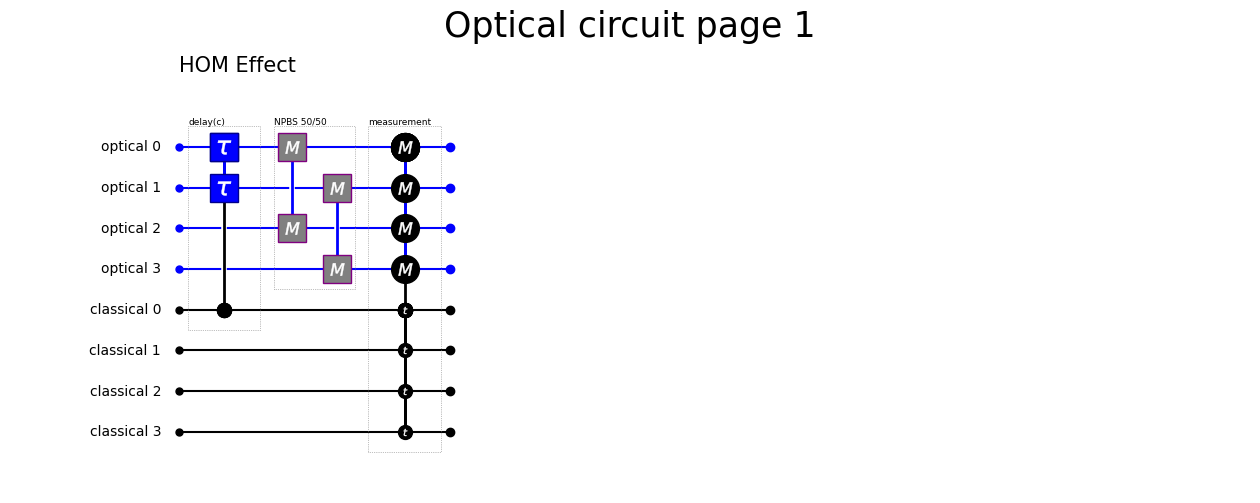

In [22]:
circuit = fsc.FockStateCircuit(length_of_fock_state = 5, 
                                no_of_optical_channels = 4, 
                                no_of_classical_channels=4,
                                circuit_name="HOM Effect"
                                )
circuit.time_delay_classical_control(affected_channels=[0,1], classical_channel_for_delay=0, bandwidth=1)

circuit.non_polarizing_50_50_beamsplitter(input_channels_a=[0,1],
                                          input_channels_b=[2,3]
                                          )
circuit.measure_optical_to_classical(optical_channels_to_be_measured=[0,1,2,3], 
                                     classical_channels_to_be_written=[0,1,2,3]
                                     )
circuit.draw()

![Alt text](Slide13.JPG)

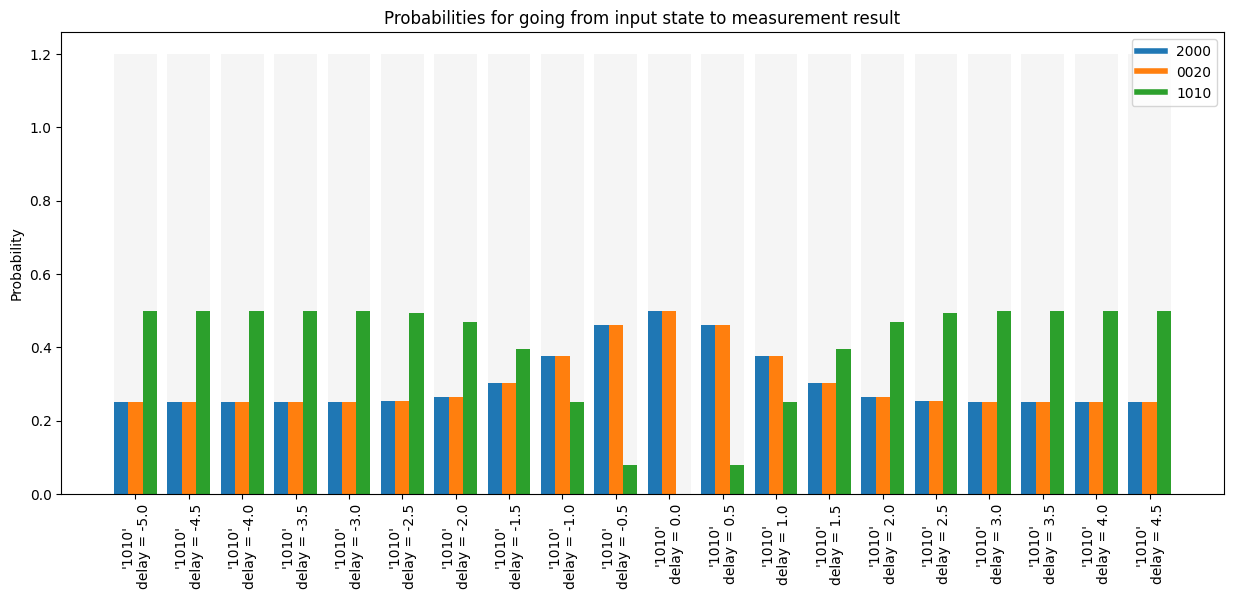

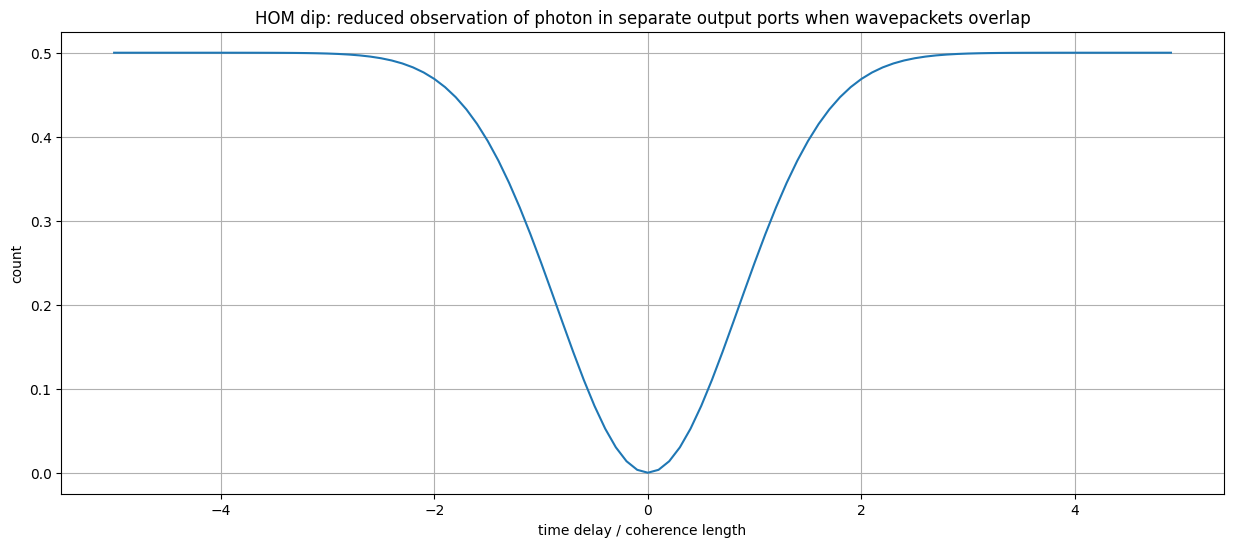

In [23]:
initial_collection_of_states = cos.CollectionOfStates(
                                fock_state_circuit=circuit, 
                                input_collection_as_a_dict=dict([])
                                )
# delays from -5 coherence length to +5 coherence length
delays = [ (number-10)/2.0 for number in range(20)]
for delay in delays:
    input_two_photons = cos.State(collection_of_states=initial_collection_of_states)
    input_two_photons.optical_components = [('1010', 1)]
    input_two_photons.classical_channel_values = [delay,0,0,0]
    input_two_photons.initial_state = "\'1010\'\ndelay = " + str(delay)
    initial_collection_of_states.add_state(state=input_two_photons)

result = circuit.evaluate_circuit(initial_collection_of_states)

result.plot()

initial_collection_of_states = cos.CollectionOfStates(
                                fock_state_circuit=circuit, 
                                input_collection_as_a_dict=dict([])
                                )
# delays from -5 coherence length to +5 coherence length
delays = [ (number-50)/10.0 for number in range(100)]
for delay in delays:
    input_two_photons = cos.State(collection_of_states=initial_collection_of_states)
    input_two_photons.optical_components = [('1010', 1)]
    input_two_photons.classical_channel_values = [delay,0,0,0]
    input_two_photons.initial_state = "\'1010\'\ndelay = " + str(delay)
    initial_collection_of_states.add_state(state=input_two_photons)

result = circuit.evaluate_circuit(initial_collection_of_states)

histo = result.plot(histo_output_instead_of_plot=True)

delays, bunched, anti_bunched  = [], [], []
for key, values in histo.items():
    delays.append(float(key.split("=")[-1]))
    bunched.append(0)
    anti_bunched.append(0)
    for value in values:
            if '2' in value['output_state']:
                bunched[-1] += value['probability']
            else:
                anti_bunched[-1] += value['probability']
anti_bunched = [i/(i+j) for i,j in zip(anti_bunched, bunched)]
fig, ax = plt.subplots()
ax.plot(delays, anti_bunched)

ax.set(xlabel='time delay / coherence length', ylabel='count',
       title='HOM dip: reduced observation of photon in separate output ports when wavepackets overlap')
ax.grid()

fig.savefig("test.png")
plt.show()

![Alt text](Slide14.JPG)

<a id="GHZ"></a> 
## GHZ-state creation

![Alt text](Slide15.JPG)

![Alt text](Slide16.JPG)

![Alt text](Slide17.JPG)

![Alt text](Slide18.JPG)

![Alt text](Slide21.JPG)

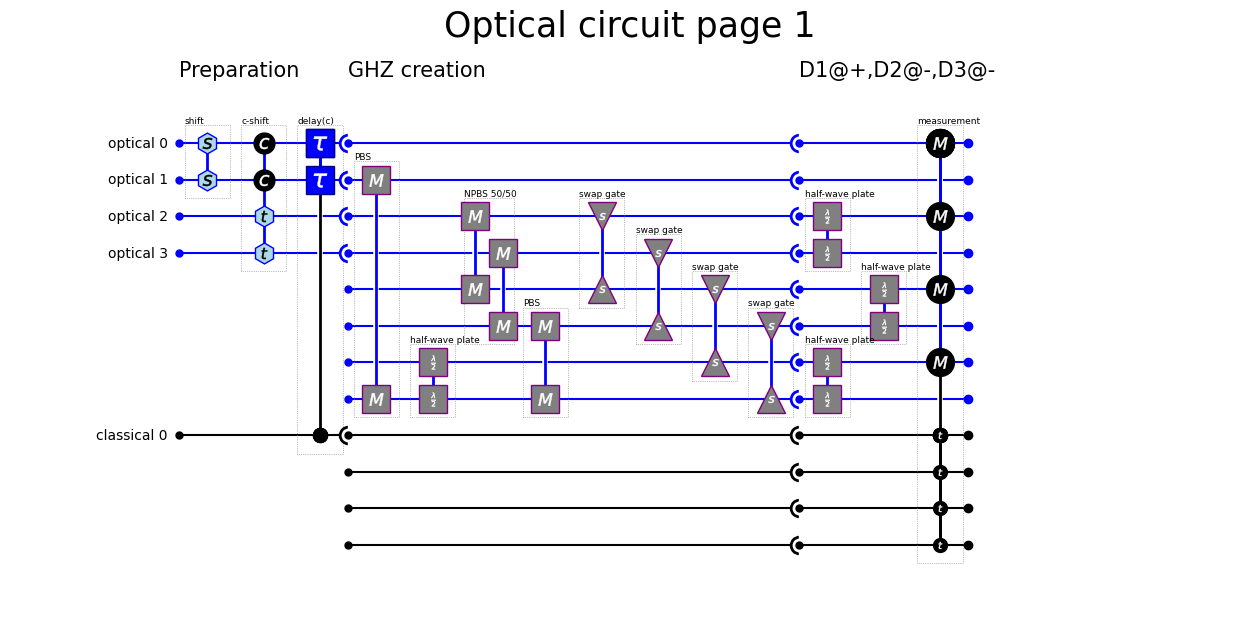

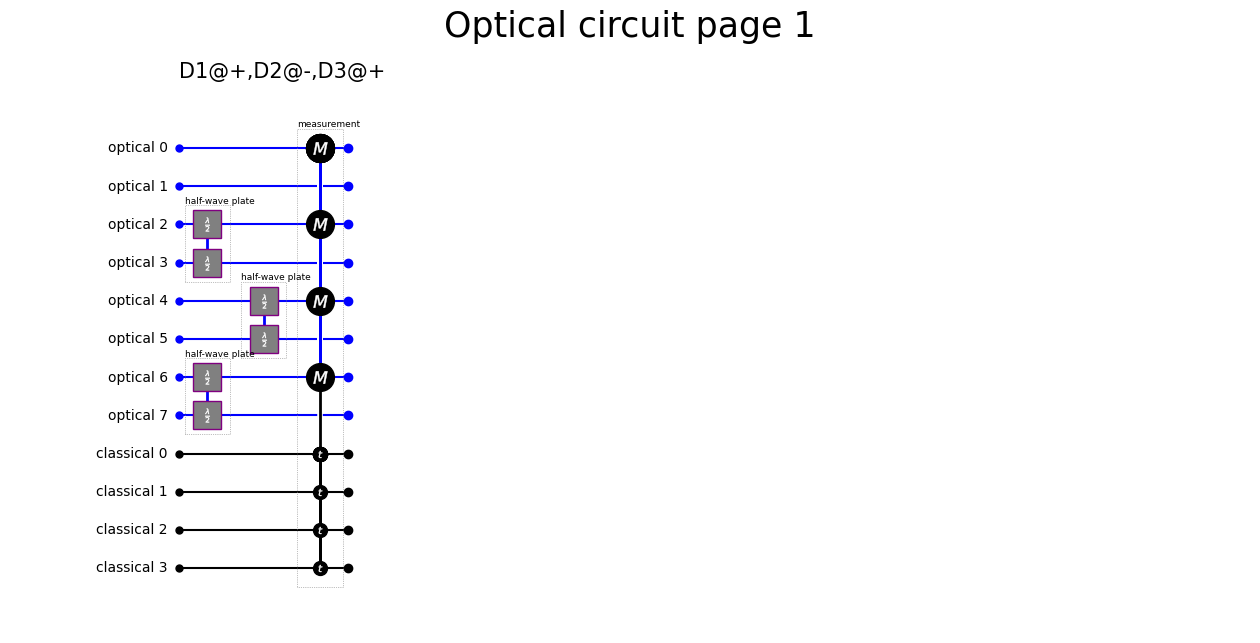

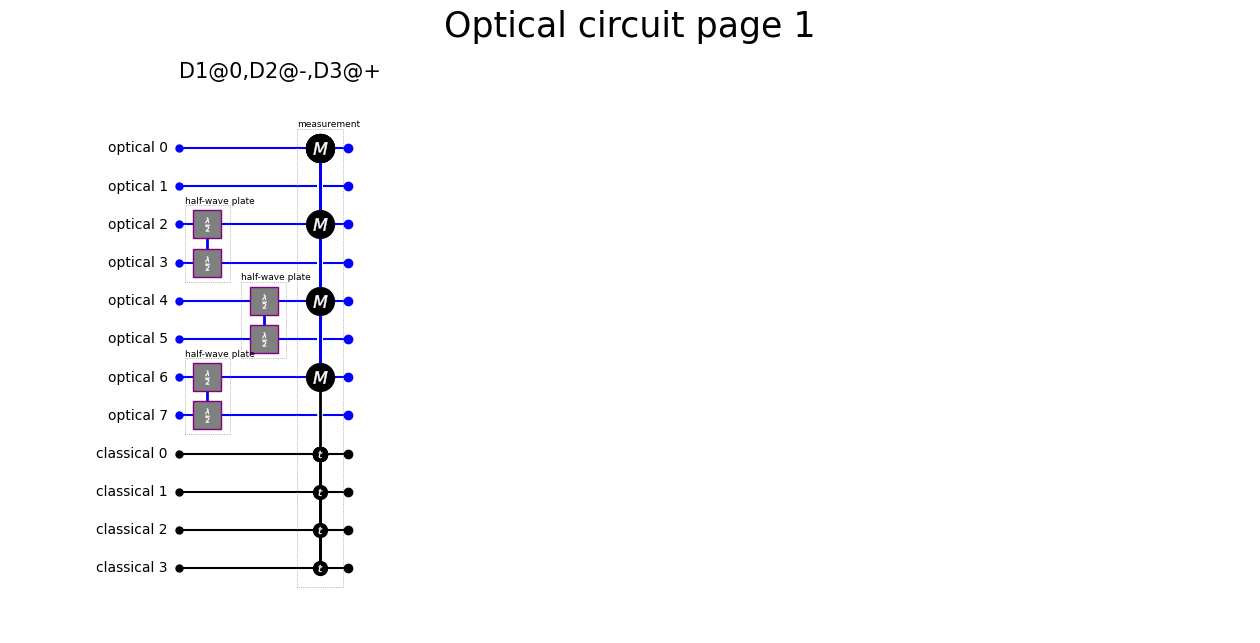

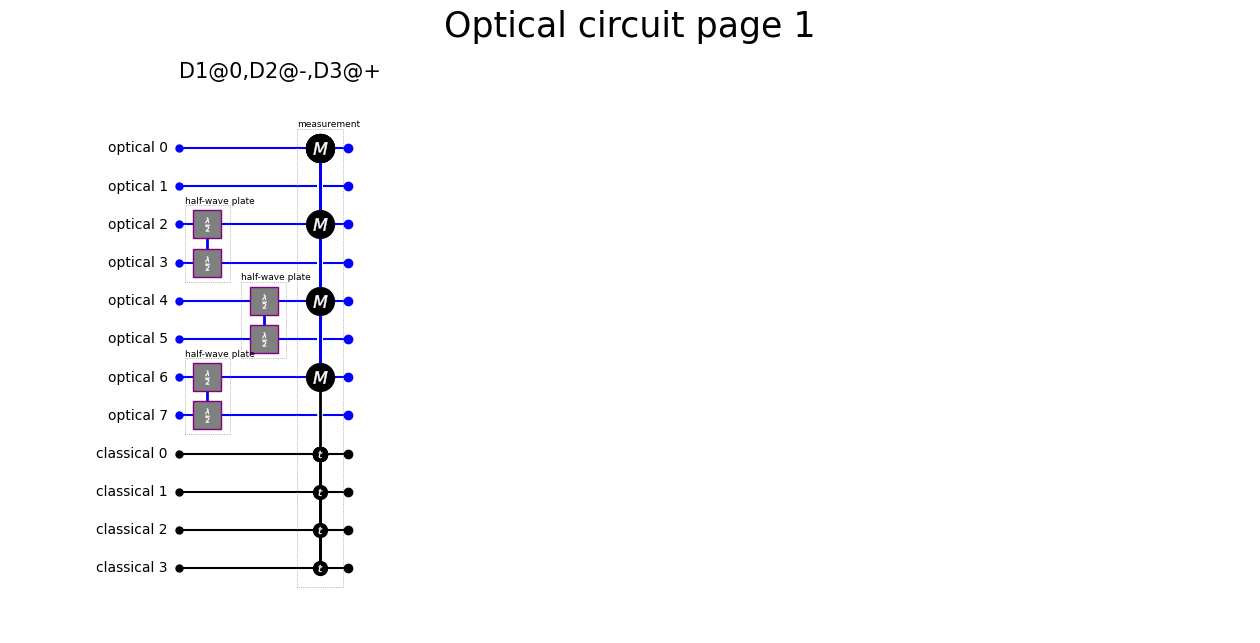

In [24]:
# Initialize a FockStateCircuit with 8 optical channels and maximum 2 photons per channel (so photon count can be 0,1 or 2 photons in a single channel)
# We use 10 classical channels. 8 channels are used to store the results from the detector and the last are used to control the half wave plate 
# in front of detector 1
circuit = fsc.FockStateCircuit( length_of_fock_state = 3, 
                                no_of_optical_channels = 8,
                                no_of_classical_channels=4,
                                circuit_name = 'GHZ creation'
                                )
preparation = fsc.FockStateCircuit( length_of_fock_state = 3, 
                                no_of_optical_channels = 4,
                                no_of_classical_channels=1,
                                circuit_name = 'Preparation'
                                )

detection_1 = fsc.FockStateCircuit( length_of_fock_state = 3, 
                                no_of_optical_channels = 8,
                                no_of_classical_channels=4,
                                circuit_name = 'D1@+,D2@-,D3@-'
                                )

detection_2 = fsc.FockStateCircuit( length_of_fock_state = 3, 
                                no_of_optical_channels = 8,
                                no_of_classical_channels=4,
                                circuit_name = 'D1@+,D2@-,D3@+'
                                )

detection_3 = fsc.FockStateCircuit( length_of_fock_state = 3, 
                                no_of_optical_channels = 8,
                                no_of_classical_channels=4,
                                circuit_name = 'D1@0,D2@-,D3@+'
                                )
detection_4 = fsc.FockStateCircuit( length_of_fock_state = 3, 
                                no_of_optical_channels = 8,
                                no_of_classical_channels=4,
                                circuit_name = 'D1@0,D2@-,D3@+'
                                )
# Start in basis $|ah>|av>|bh>|bv>|BSh>|BSv>|PBSh>|PBSv>$
preparation.shift(target_channels = [0,1], shift_per_channel = [1,1])

preparation.c_shift(control_channels=[0,1],target_channels=[2,3])
preparation.time_delay_classical_control(affected_channels=[0,1], classical_channel_for_delay=0, bandwidth=1)

preparation.bridge(next_fock_state_circuit=circuit)


# The polarizing beamsplitter works between channels 0,1 and 6,7 
# (so between channel 'a' and the PBS vacuum input)
circuit.polarizing_beamsplitter(input_channels_a=(0,1),input_channels_b=(6,7))

# We add the half wave plate behind the polarizing beamsplitter
# This is for channels 6 and 7 representing horizontal and vertical polarization for this output of the PBS
circuit.half_wave_plate_225(channel_horizontal=7,channel_vertical=6)

# The non-polarizing beamsplitter in front of detector 3 works between channels 2,3 and 4,5 
# (so between channel 'b' and the BS vacuum input)

circuit.non_polarizing_50_50_beamsplitter(input_channels_a=(2,3),input_channels_b=(4,5))
# We add the second non-polarizing beamsplitter mixing the output of the half wave plate and the first non-polarizing beamsplitter
circuit.polarizing_beamsplitter(input_channels_a=(6,7),input_channels_b=(4,5))



# bring the output to basis ThTbD1hD1vD2hD2vD3hD3v
circuit.swap(4,2) 
circuit.swap(5,3)
circuit.swap(4,6)
circuit.swap(5,7)

circuit.bridge(next_fock_state_circuit=detection_1)

# We add a half wave plate in front of detector D1 at +22.5 degree 
detection_1.half_wave_plate(channel_horizontal=2,channel_vertical=3, angle = math.pi/8)
detection_2.half_wave_plate(channel_horizontal=2,channel_vertical=3, angle = math.pi/8)
detection_3.half_wave_plate(channel_horizontal=2,channel_vertical=3, angle = 0)
detection_4.half_wave_plate(channel_horizontal=2,channel_vertical=3, angle = 0)

# We add a half wave plate in front of detector D2 at -22.5 degree 
detection_1.half_wave_plate(channel_horizontal=4, channel_vertical=5, angle = -1*math.pi/8)
detection_2.half_wave_plate(channel_horizontal=4, channel_vertical=5, angle = -1*math.pi/8)
detection_3.half_wave_plate(channel_horizontal=4, channel_vertical=5, angle = -1*math.pi/8)
detection_4.half_wave_plate(channel_horizontal=4, channel_vertical=5, angle = -1*math.pi/8)

# We add a half wave plate in front of detector D3 at +22.5 degree or -22.5 degree
# for detection_1 with D3 at +45 degree we see 6% occurence of 4 fold correlation
# for two photons channel a this should lead to a photon on Th and D2h, for two photons in b this should lead to a photon on D1h and D3h
# for detection_2 with D3 at -45 degree we see no occurence of 4 fold correlation
detection_1.half_wave_plate(channel_horizontal=6, channel_vertical=7, angle = +1*math.pi/8)
detection_2.half_wave_plate(channel_horizontal=6, channel_vertical=7, angle = -1*math.pi/8)
detection_3.half_wave_plate(channel_horizontal=6, channel_vertical=7, angle = +1*math.pi/8)
detection_4.half_wave_plate(channel_horizontal=6, channel_vertical=7, angle = -1*math.pi/8)

# We map the optical channels on the classical channels such that the result in the classical channels in the order Th,Tv,D1h,D1,D2,D2,D3h,D3v
detection_1.measure_optical_to_classical(optical_channels_to_be_measured=[0,2,4,6],classical_channels_to_be_written=[0,1,2,3])
detection_2.measure_optical_to_classical(optical_channels_to_be_measured=[0,2,4,6],classical_channels_to_be_written=[0,1,2,3])
detection_3.measure_optical_to_classical(optical_channels_to_be_measured=[0,2,4,6],classical_channels_to_be_written=[0,1,2,3])
detection_4.measure_optical_to_classical(optical_channels_to_be_measured=[0,2,4,6],classical_channels_to_be_written=[0,1,2,3])

# And we can draw a schematic of the circuit
circuit_draw_settings = { 'spacing_between_lines_in_relation_to_spacing_between_nodes' : 1.5,'number_of_nodes_on_a_line': 14}
preparation.draw(settings_for_drawing_circuit=circuit_draw_settings)
detection_2.draw(settings_for_drawing_circuit=circuit_draw_settings)
detection_4.draw(settings_for_drawing_circuit=circuit_draw_settings)
detection_3.draw(settings_for_drawing_circuit=circuit_draw_settings)

![Alt text](Slide22.JPG)

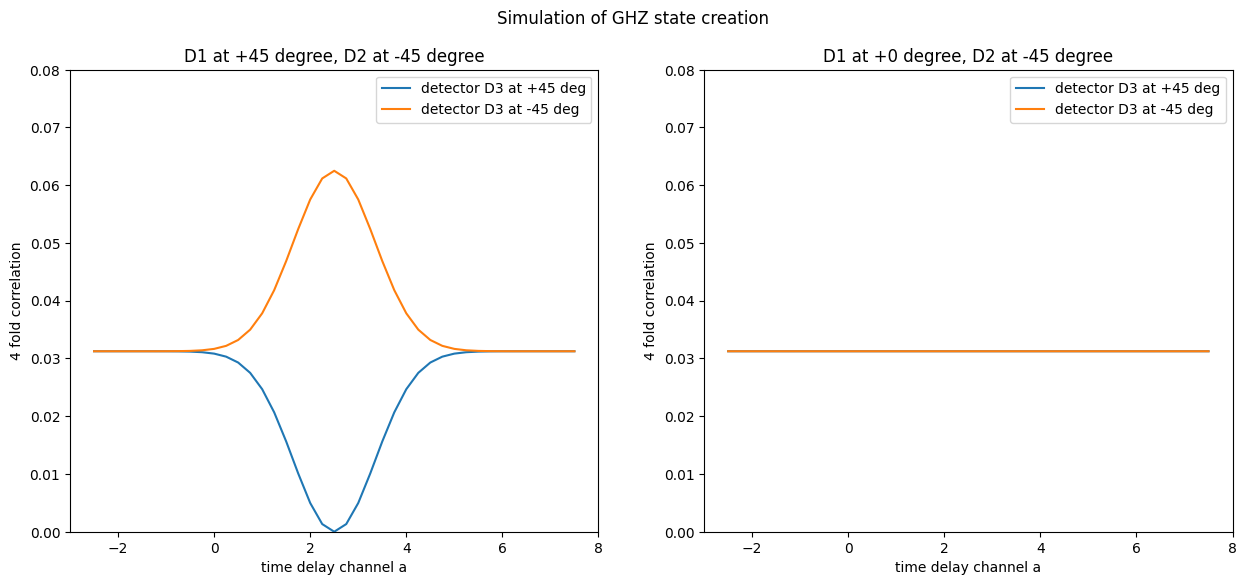

In [25]:
delays = [ (number-10)/4.0 for number in range(41)]
probs_detection1 = [0.03124999572604663, 0.031249991612374593, 0.031249971596705717, 0.03124988250217455, 0.031249519820261903, 0.031248170174256247, 0.03124358112754345, 0.031229332359852015, 0.03118896150764768, 0.031084682277232385, 0.030839402748527346, 0.030314837303590473, 0.029296871866283533, 0.02750935924225459, 0.02468049411590104, 0.02066987632861874, 0.015624998328684553, 0.010089755999868373, 0.0049719864914968635, 0.001324897336452988, 0, 0.001324897336452988, 0.0049719864914968635, 0.010089755999868373, 0.015624998328684553, 0.02066987632861874, 0.02468049411590104, 0.02750935924225459, 0.029296871866283533, 0.030314837303590473, 0.030839402748527346, 0.031084682277232385, 0.03118896150764768, 0.031229332359852015, 0.03124358112754345, 0.031248170174256247, 0.031249519820261903, 0.03124988250217455, 0.031249971596705717, 0.031249991612374593, 0.03124999572604663]
probs_detection2 = [0.03124999572604663, 0.031249991612374593, 0.031249971596705717, 0.03124988250217455, 0.031249519820261903, 0.031248170174256247, 0.031256412185932086, 0.031270660950819165, 0.03131103179507795, 0.03141531100496963, 0.03166059048540018, 0.03218515582709518, 0.033203121064052155, 0.03499063333627339, 0.03781949790586636, 0.04183011490380251, 0.04687499191083351, 0.052410233150235894, 0.05752800165135815, 0.061175090088603404, 0.06249998716429791, 0.061175090088603404, 0.05752800165135815, 0.052410233150235894, 0.04687499191083351, 0.04183011490380251, 0.03781949790586636, 0.03499063333627339, 0.033203121064052155, 0.03218515582709518, 0.03166059048540018, 0.03141531100496963, 0.03131103179507795, 0.031270660950819165, 0.031256412185932086, 0.031248170174256247, 0.031249519820261903, 0.03124988250217455, 0.031249971596705717, 0.031249991612374593, 0.03124999572604663]
probs_detection3 = [0.031249996260867528, 0.03124999214719542, 0.031249972131526207, 0.03124988303699351, 0.03124952035507466, 0.03124817070904591, 0.031249997191668474, 0.031249997190510158, 0.031249997187228304, 0.031249997178751154, 0.031249997158811695, 0.031249997116168306, 0.03124999703341506, 0.031249996888103176, 0.03124999665813685, 0.031249996332102556, 0.03124999592199036, 0.03124999547201509, 0.031249995055977343, 0.031249994759495303, 0.031249994651790708, 0.031249994759495303, 0.031249995055977343, 0.03124999547201509, 0.03124999592199036, 0.031249996332102556, 0.03124999665813685, 0.031249996888103176, 0.03124999703341506, 0.031249997116168306, 0.031249997158811695, 0.031249997178751154, 0.031249997187228304, 0.031249997190510158, 0.031249997191668474, 0.03124817070904591, 0.03124952035507466, 0.03124988303699351, 0.031249972131526207, 0.03124999214719542, 0.031249996260867528]
probs_detection4 =[0.031249996260867528, 0.03124999214719542, 0.031249972131526207, 0.03124988303699351, 0.03124952035507466, 0.03124817070904591, 0.031249997191668474, 0.031249997190510158, 0.031249997187228304, 0.031249997178751154, 0.031249997158811695, 0.031249997116168306, 0.03124999703341506, 0.031249996888103176, 0.03124999665813685, 0.031249996332102556, 0.03124999592199036, 0.03124999547201509, 0.031249995055977343, 0.031249994759495303, 0.031249994651790708, 0.031249994759495303, 0.031249995055977343, 0.03124999547201509, 0.03124999592199036, 0.031249996332102556, 0.03124999665813685, 0.031249996888103176, 0.03124999703341506, 0.031249997116168306, 0.031249997158811695, 0.031249997178751154, 0.031249997187228304, 0.031249997190510158, 0.031249997191668474, 0.03124817070904591, 0.03124952035507466, 0.03124988303699351, 0.031249972131526207, 0.03124999214719542, 0.031249996260867528]

fig, (ax1, ax2) = plt.subplots(1, 2)
fig.suptitle('Simulation of GHZ state creation')
ax1.set_title("D1 at +45 degree, D2 at -45 degree")
ax1.set_xlabel('time delay channel a')
ax1.set_ylabel('4 fold correlation')
ax1.set_ylim(0,0.08)

ax1.plot(delays,probs_detection1, label = "detector D3 at +45 deg")
ax1.plot(delays,probs_detection2, label = "detector D3 at -45 deg")
ax1.legend()
ax2.set_title("D1 at +0 degree, D2 at -45 degree")
ax2.set_xlabel('time delay channel a')
ax2.set_ylabel('4 fold correlation')
ax2.set_ylim(0,0.08)

ax2.plot(delays,probs_detection3, label = "detector D3 at +45 deg")
ax2.plot(delays,probs_detection4, label = "detector D3 at -45 deg")
ax2.legend()

![Alt text](Slide23.JPG)

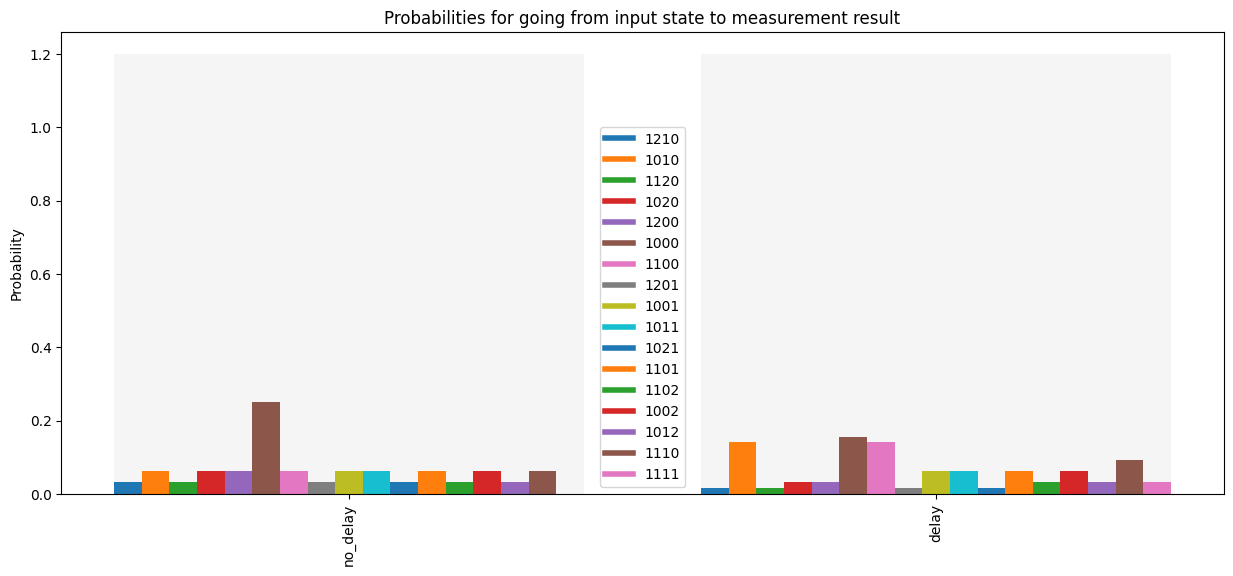

In [26]:
initial_collection_of_states_delay = cos.CollectionOfStates(fock_state_circuit=preparation, input_collection_as_a_dict=dict([]))

state1 = cos.State(collection_of_states=initial_collection_of_states_delay)
state1.initial_state = 'no_delay'
state1.optical_components = [('0000', 1)]
state1.classical_channel_values = [0]

state2 = cos.State(collection_of_states=initial_collection_of_states_delay)
state2.initial_state = 'delay'
state2.optical_components = [('0000', 1)]
state2.classical_channel_values = [10]

initial_collection_of_states_delay.add_state(state1)
initial_collection_of_states_delay.add_state(state2)

result_delay = preparation.evaluate_circuit(collection_of_states_input=initial_collection_of_states_delay)
result_delay.plot()

<a id="Teleportation"></a> 
## Quantum Teleportation

![Alt text](Slide24.JPG)

![Alt text](Slide25.JPG)

![Alt text](Slide28.JPG)

![Alt text](Slide29.JPG)

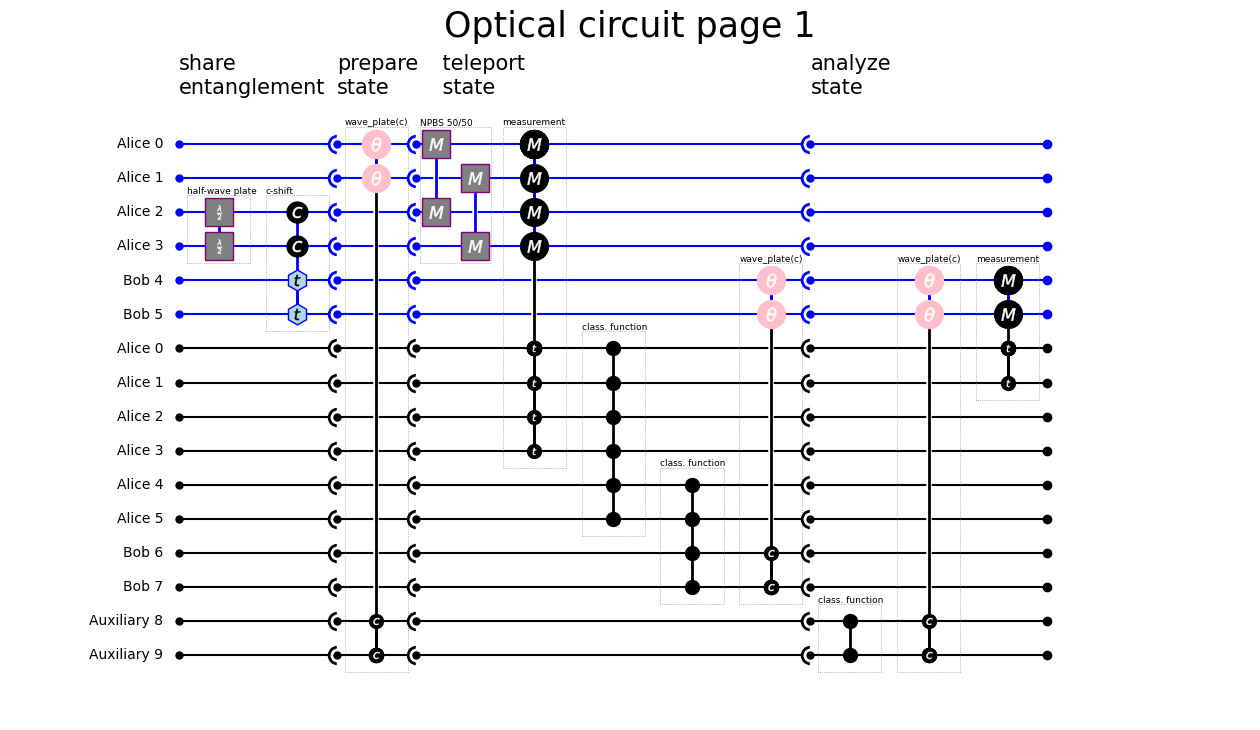

In [27]:
# create the shared entangled state in channels 2,3,4 and 5
box = fsc.FockStateCircuit( length_of_fock_state = 3, 
                            no_of_optical_channels = 6,
                            no_of_classical_channels= 10,
                            circuit_name="share\nentanglement"
                            )
box.half_wave_plate_225(channel_horizontal=3,channel_vertical=2)
box.c_shift(control_channels=[2,3], target_channels=[5,4])
preparation = fsc.FockStateCircuit( length_of_fock_state = 3, 
                                    no_of_optical_channels = 6,
                                    no_of_classical_channels=10,
                                    circuit_name="prepare\nstate"
                                    )
box.bridge(preparation)

# prepare the source photon (channels 0-1 based on values in auxiliary channels 8 and 9
preparation.wave_plate_classical_control(   optical_channel_horizontal = 0,
                                            optical_channel_vertical = 1,
                                            classical_channel_for_orientation = 8,
                                            classical_channel_for_phase_shift = 9
                                            )

# ========= Starting the teleportation =================
teleportation = fsc.FockStateCircuit(   length_of_fock_state = 3, 
                                                no_of_optical_channels = 6,
                                                no_of_classical_channels=10,
                                                circuit_name="    teleport\n    state"
                                                )
preparation.bridge(teleportation)
# Bell state measurement by sender on source photon and first photon of shared pair
# write the result to classical channels 0-3
teleportation.non_polarizing_50_50_beamsplitter(input_channels_a = (0,1), 
                                                input_channels_b = (2,3)
                                                )
teleportation.measure_optical_to_classical( optical_channels_to_be_measured=[0,1,2,3],
                                            classical_channels_to_be_written=[0,1,2,3]
                                            )

# define communication in channels 6 and 7 to receiver based on outcome of Bell State measurement
def define_communication_bits(input_list, new_values = [], affected_channels = []):
    # if a Bell state is detected the two bits are 0-0 or 0-1
    lookup_table = {(1,1,0,0) : (0,0),
                    (0,0,1,1) : (0,0),
                    (0,1,1,0) : (0,1),
                    (1,0,0,1) : (0,1)
                    }
    
    # default value for the two bits is 1-1
    communication = lookup_table.get(tuple(input_list[0:4]),(1,1))
    
    input_list[4], input_list[5] = communication[0], communication[1]
    return input_list

teleportation.classical_channel_function(define_communication_bits, affected_channels=[0,1,2,3,4,5])

# at receiver side, read the communication in channels 6 and 7 and 
# decide how to oriented the wave plates for retrieving the desired quantum state
def determine_wave_plate_settings(input_list, new_values = [], affected_channels = []):
    # if the communication is 0-0 apply a phase shift. if it is 0-0 do nothing.
    lookup_table = {(0,0) : (0,math.pi), (0,1) : (0,0)}
    bell_result = tuple(input_list[4:6])
    communication = lookup_table.get(bell_result,(0,0))
    input_list[6], input_list[7] = communication[0], communication[1]
    return input_list

teleportation.classical_channel_function(determine_wave_plate_settings, affected_channels=[4,5,6,7])

teleportation.wave_plate_classical_control( optical_channel_horizontal = 4,
                                            optical_channel_vertical = 5,
                                            classical_channel_for_orientation = 6,
                                            classical_channel_for_phase_shift = 7
                                            )

# ========= Teleportation complete ================= 
analysis = fsc.FockStateCircuit(   length_of_fock_state = 3, 
                                    no_of_optical_channels = 6,
                                    no_of_classical_channels=10,
                                    circuit_name="analyze\nstate"
                                    )
teleportation.bridge(analysis)

# reverse the operation on the source photon, but now for the target photon
def reverse_angles(input_list, new_values = [], affected_channels = []):
    input_list[8], input_list[9] = input_list[8], -1*input_list[9]
    return input_list
analysis.classical_channel_function(reverse_angles, affected_channels=[8,9])  

analysis.wave_plate_classical_control( optical_channel_horizontal = 4,
                                        optical_channel_vertical = 5,
                                        classical_channel_for_orientation = 8,
                                        classical_channel_for_phase_shift = 9)

# perform a measurement on the target photon in optical channel 6 and 7 
analysis.measure_optical_to_classical( optical_channels_to_be_measured=[4,5],
                                        classical_channels_to_be_written=[0,1])


optical_channels = ["Alice 0","Alice 1","Alice 2", "Alice 3", "Bob 4", "Bob 5"]
classical_channels = ["Alice 0","Alice 1","Alice 2", "Alice 3","Alice 4", "Alice 5", "Bob 6", "Bob 7", "Auxiliary 8", "Auxiliary 9"]
settings = {'channel_labels_optical': optical_channels , 'channel_labels_classical':classical_channels, 'number_of_nodes_on_a_line' : 11}
box.draw(settings_for_drawing_circuit=settings)

![Alt text](Slide30.JPG)

In [28]:
# a list of random settings for the source photon, to show teleportation works for any state
list_of_source_photons = [(math.pi,math.pi), 
                          (math.pi/2,-1*math.pi/3), 
                          (-1*math.pi/4,math.pi/4), 
                          ((3/7)*math.pi,(1/7)*math.pi), 
                          (0,0)
                          ]

initial_collection_of_states = cos.CollectionOfStates(fock_state_circuit=box)
state_default = initial_collection_of_states.get_state(initial_state='000000').copy()
initial_collection_of_states.clear()

# create collection of states with one state per setting for the source photon
for index, setting in enumerate(list_of_source_photons):      
    state = state_default.copy()
    state.initial_state = 'state_0' + str(index)
    state.optical_components = [('101000', 1)]

    state.classical_channel_values = [0]*8 + [setting[0]] + [setting[1]]
    initial_collection_of_states.add_state(state)

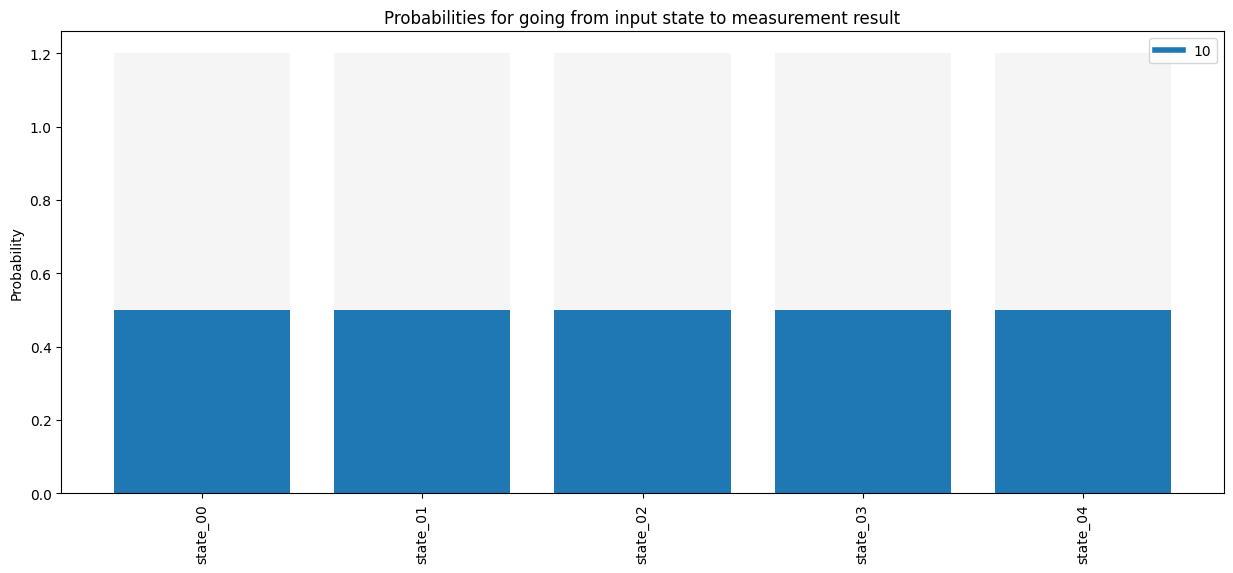

In [29]:
result = box.evaluate_circuit(collection_of_states_input=initial_collection_of_states)

# filter on the outcomes where classical channel 6 is '0'. Only in these case a Bell state has been detected
result.filter_on_classical_channel(classical_channel_numbers=[4], values_to_filter=[0])

result.plot(classical_channels=[0,1])

![Alt text](Slide31.JPG)

<a id="EPR"></a> 
## The EPR experiment by Alain Aspect

![Alt text](Slide32.JPG)

![Alt text](Slide33.JPG)

![Alt text](Slide34.JPG)

![Alt text](Slide35.JPG)

![Alt text](Slide36.JPG)

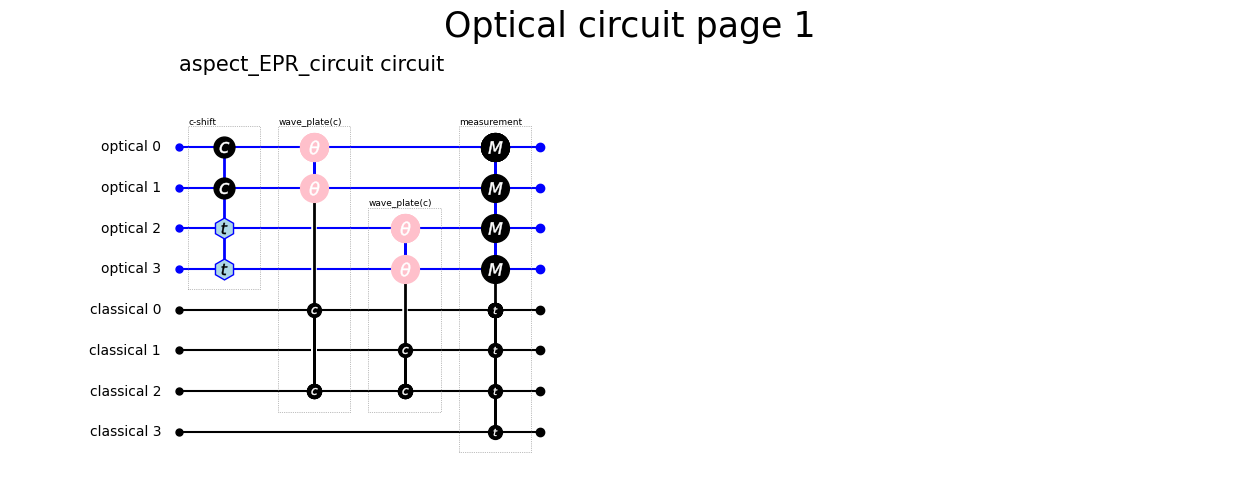

In [30]:
aspect_EPR_circuit = fsc.FockStateCircuit(length_of_fock_state = 3, 
                                no_of_optical_channels = 4,
                                no_of_classical_channels=4,
                                circuit_name='aspect_EPR_circuit circuit'
                                )
aspect_EPR_circuit.c_shift(control_channels=[0,1], target_channels=[2,3])  


aspect_EPR_circuit.wave_plate_classical_control(optical_channel_horizontal=0,
                                     optical_channel_vertical=1,
                                     classical_channel_for_orientation=0,
                                     classical_channel_for_phase_shift=2)
aspect_EPR_circuit.wave_plate_classical_control(optical_channel_horizontal=2,
                                     optical_channel_vertical=3,
                                     classical_channel_for_orientation=1,
                                     classical_channel_for_phase_shift=2)
aspect_EPR_circuit.measure_optical_to_classical(optical_channels_to_be_measured=[0,1,2,3],
                                                    classical_channels_to_be_written=[0,1,2,3]
                                                    )
aspect_EPR_circuit.draw()

measurements = {'AB': [0, np.pi/16,np.pi,0], 
                'Ab': [0, np.pi/16 +  np.pi/8 ,np.pi,0], 
                'aB': [np.pi/8, np.pi/16,np.pi,0], 
                'ab': [np.pi/8, np.pi/16+np.pi/8,np.pi,0]
                }
def get_EPR_histogram(measurements):
    initial_collection_of_states = cos.CollectionOfStates(fock_state_circuit=aspect_EPR_circuit, 
                                                        input_collection_as_a_dict=dict([]))
    for name, measurement in measurements.items():
        state = cos.State(collection_of_states=initial_collection_of_states)
        new_state = state.copy()
        new_state.initial_state = name
        new_state.optical_components= [('1000', np.sqrt(0.5)), ('0100', np.sqrt(0.5))]
        new_state.classical_channel_values= measurement
        initial_collection_of_states.add_state(new_state)

    result = aspect_EPR_circuit.evaluate_circuit(collection_of_states_input=initial_collection_of_states)
    return result.plot(histo_output_instead_of_plot=True)

def histo_to_correlation(histo):
    correlation = dict([])
    correlated = ['1010', '0101']
    anti_correlated = ['0110', '1001']
    for key, values in histo.items():
        cor, a_cor = 0.0,0.0
        for value in values:
            if value['output_state'] in correlated:
                cor += value['probability']
            if value['output_state'] in anti_correlated:
                a_cor += value['probability']
        correlation.update({key : (cor - a_cor)/(1.0*cor + 1.0*a_cor)})
    return correlation

def correlation_to_CHSH(correlation):
    return correlation['AB'] - correlation['Ab'] + correlation['aB'] + correlation['ab']

angles = []
CHSHs = []
for i in range(0,250):
    angle = (1/2) * np.pi * (i/(1.0*250))
    measurements = {'AB': [0, angle,np.pi,0], 
                'Ab': [0, angle +  np.pi/8 ,np.pi,0], 
                'aB': [np.pi/8, angle,np.pi,0], 
                'ab': [np.pi/8, angle+np.pi/8,np.pi,0]
                }
    histo = get_EPR_histogram(measurements)
    correlation = histo_to_correlation(histo)
    CHSH = correlation_to_CHSH(correlation)
    angles.append(angle)
    CHSHs.append(CHSH)
    

![Alt text](Slide37.JPG)

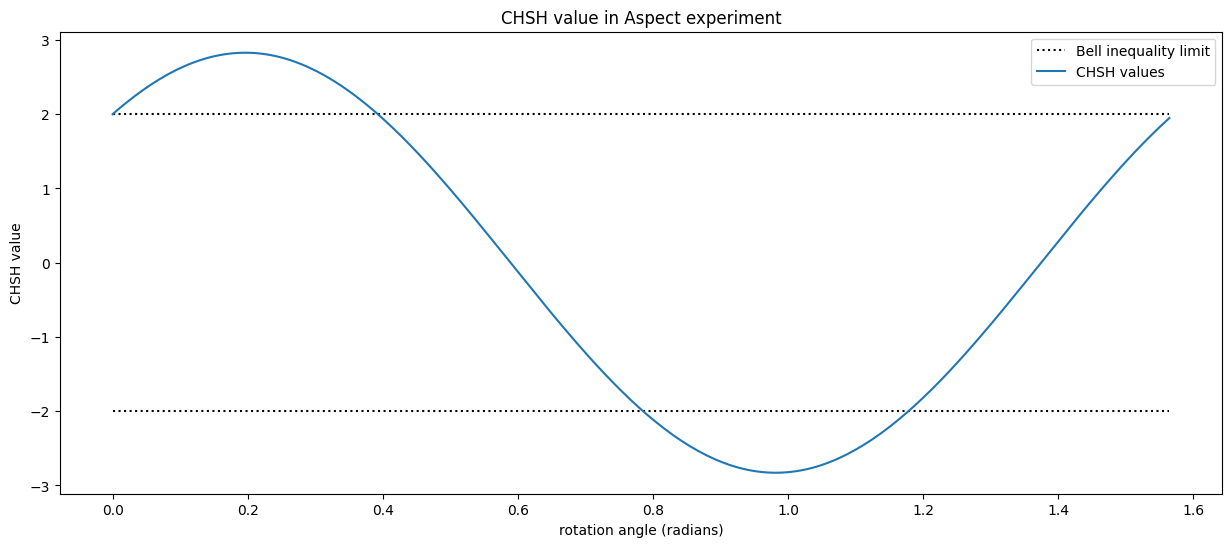

In [31]:
fig, ax = plt.subplots()
ax.plot([0,max(angles)],[2,2], color = 'black', linestyle = ':', label = 'Bell inequality limit')
ax.plot([0,max(angles)],[-2,-2], color = 'black', linestyle = ':', label = None)
ax.plot(angles,CHSHs, label = 'CHSH values')
ax.set(xlabel='rotation angle (radians)', ylabel='CHSH value',
       title='CHSH value in Aspect experiment')
ax.legend()

![Alt text](Slide38.JPG)

![Alt text](Slide39.JPG)

<a id="Decoherence"></a> 
## The classical-quantum boundary (decoherence)

![Alt text](Slide40.JPG)

![Alt text](Slide41.JPG)

![Alt text](Slide42.JPG)

![Alt text](Slide43.JPG)

![Alt text](Slide47b.jpg)

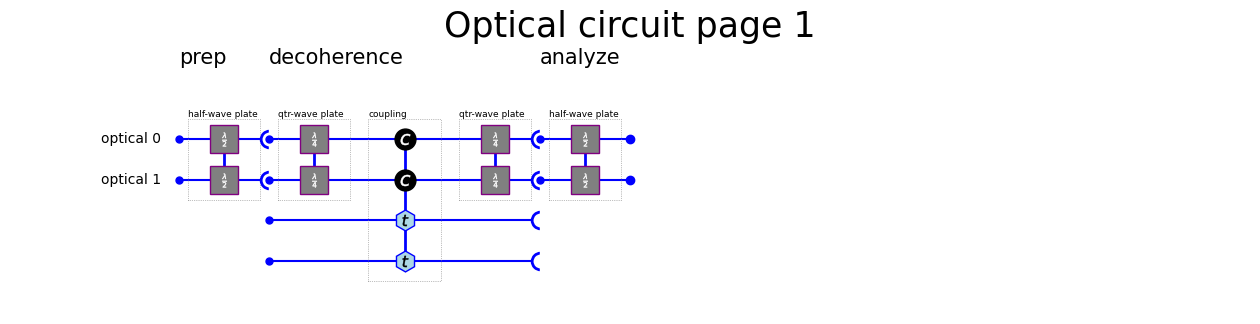

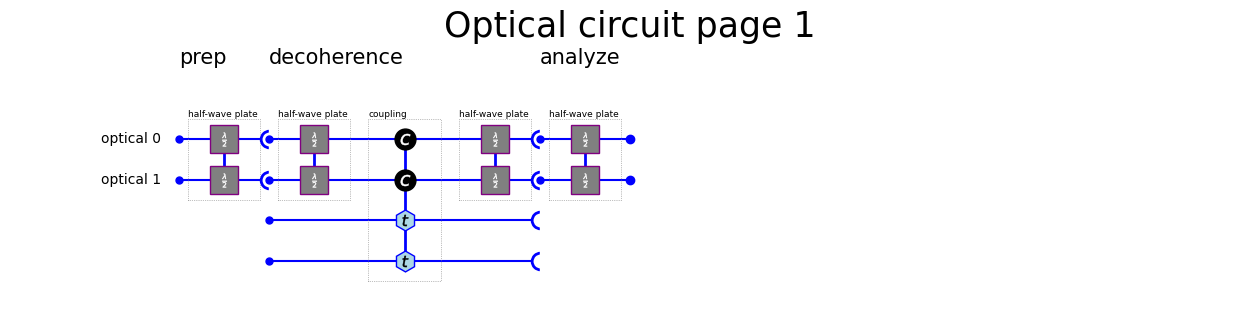

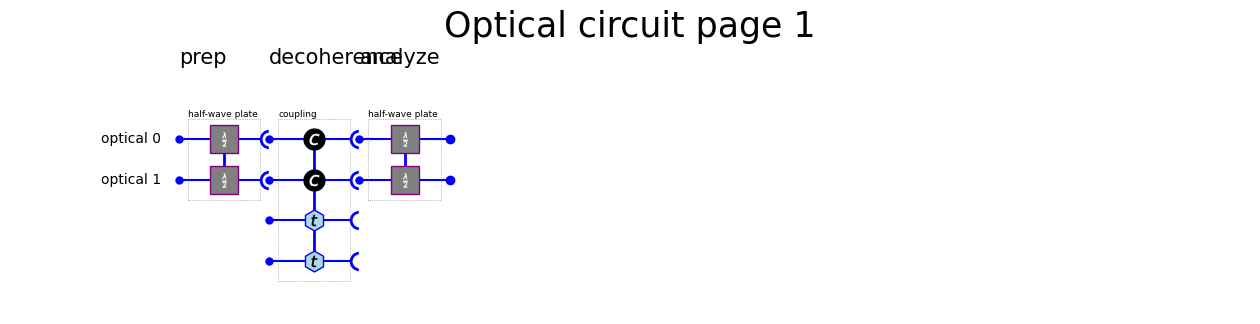

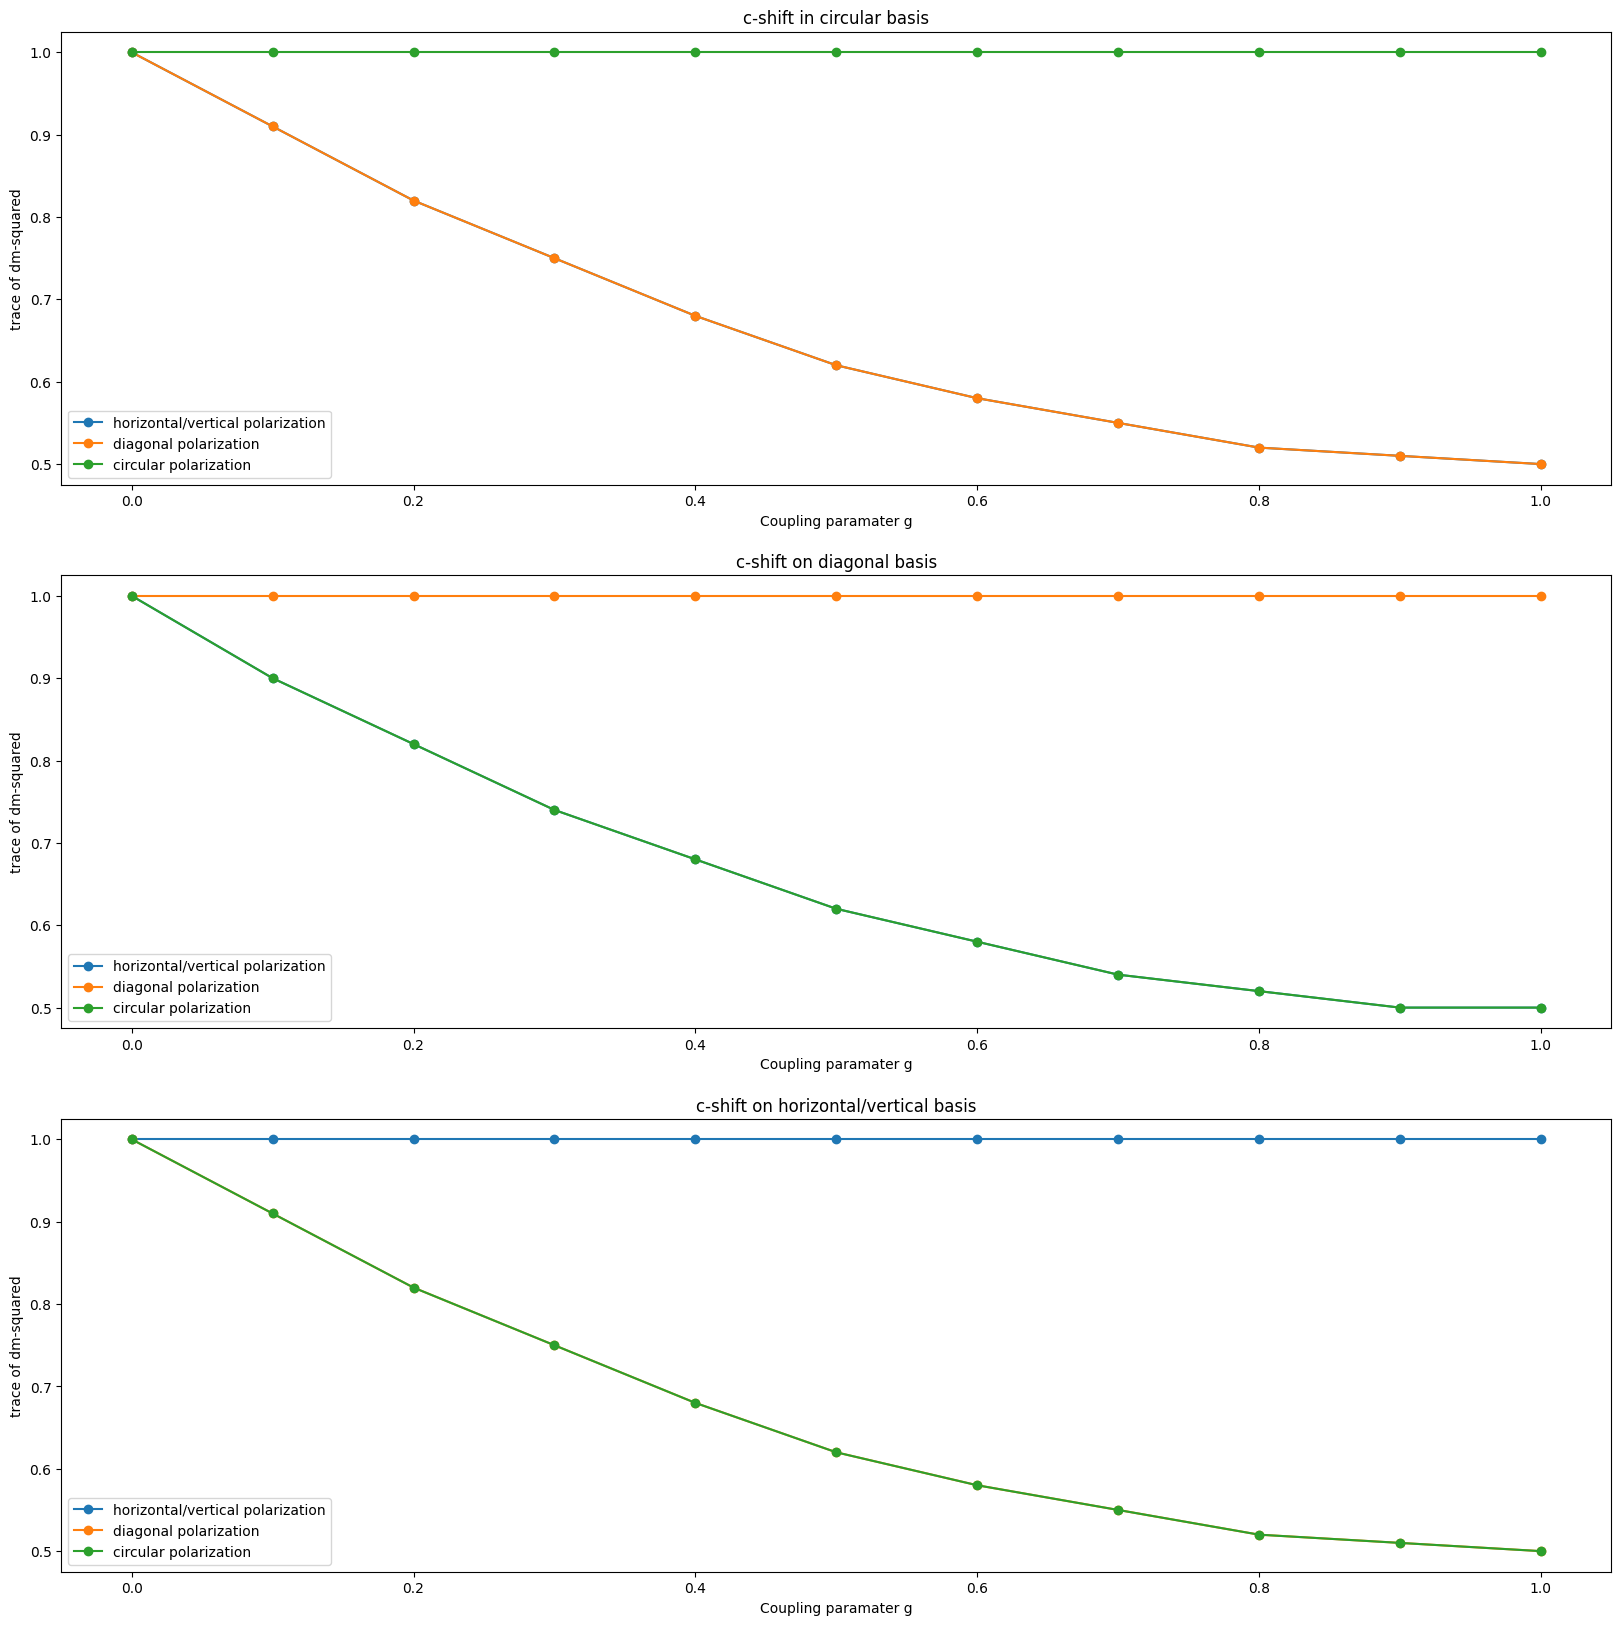

In [32]:
trace_horver = []
trace_diagonal = []
trace_circular = []
gs = [i/10 for i in range(11)]
outcomes = dict([])
for coupling in ['circular', 'diagonal', 'horver']:
    trace_horver = []
    trace_diagonal = []
    trace_circular = []
    for g in [i/10 for i in range(11)]:
        circuit_preparation = fsc.FockStateCircuit(length_of_fock_state = 2, 
                                        no_of_optical_channels = 2,
                                        no_of_classical_channels=0,
                                        circuit_name = "prep"
                                        )

        circuit_preparation.half_wave_plate(channel_horizontal=0, channel_vertical=1, angle = 0)
        circuit_decoherence = fsc.FockStateCircuit(length_of_fock_state = 2, 
                                        no_of_optical_channels = 4,
                                        no_of_classical_channels=0,
                                        circuit_name = "decoherence"
                                        )
        circuit_preparation.bridge(next_fock_state_circuit=circuit_decoherence)
        if coupling == 'circular':
            circuit_decoherence.quarter_wave_plate_45(channel_horizontal=0, channel_vertical=1)
            circuit_decoherence.channel_coupling(control_channels=[0,1], target_channels=[2,3], coupling_strength=g)
            circuit_decoherence.quarter_wave_plate_45(channel_horizontal=1, channel_vertical=0)
        elif coupling == 'diagonal':
            circuit_decoherence.half_wave_plate_225(channel_horizontal=0, channel_vertical=1)
            circuit_decoherence.channel_coupling(control_channels=[0,1], target_channels=[2,3], coupling_strength=g)
            circuit_decoherence.half_wave_plate_225(channel_horizontal=1, channel_vertical=0)
        else:
            circuit_decoherence.channel_coupling(control_channels=[0,1], target_channels=[2,3], coupling_strength=g)
        circuit_analysis = fsc.FockStateCircuit(length_of_fock_state = 2, 
                                        no_of_optical_channels = 2,
                                        no_of_classical_channels=0,
                                        circuit_name = "analyze"
                                        )
        circuit_decoherence.bridge(next_fock_state_circuit=circuit_analysis)
        circuit_analysis.half_wave_plate(channel_horizontal=0, channel_vertical=1, angle = 0)
        if g == 0:
            circuit_preparation.draw()
        amp = 1/np.sqrt(2)
        initial_collection_of_states = cos.CollectionOfStates(fock_state_circuit=circuit_preparation, input_collection_as_a_dict=dict([]))
        state = cos.State(collection_of_states=initial_collection_of_states)
        state.initial_state = 'horizontal'
        state.optical_components= [('10',1)]
        initial_collection_of_states.add_state(state=state)

        state = cos.State(collection_of_states=initial_collection_of_states)
        state.initial_state = 'diagonal'
        state.optical_components= [('10',amp), ('01',-1*amp)]
        initial_collection_of_states.add_state(state=state)

        state = cos.State(collection_of_states=initial_collection_of_states)
        state.initial_state = 'circular'
        state.optical_components= [('10',np.cdouble(amp)), ('01',np.cdouble(1j*amp))]
        initial_collection_of_states.add_state(state=state)

        result = circuit_preparation.evaluate_circuit(collection_of_states_input=initial_collection_of_states)

        dm = result.density_matrix()
        trace_horver.append(dm['horizontal']['trace_dm_squared'])
        trace_diagonal.append(dm['diagonal']['trace_dm_squared'])
        trace_circular.append(dm['circular']['trace_dm_squared'])
    traces = dict([])
    traces.update({'horver': trace_horver})
    traces.update({'diagonal':trace_diagonal})
    traces.update({'circular':trace_circular})
    outcomes.update({coupling:traces})

plt.rcParams['figure.figsize'] = (20, 20)
fig, ax = plt.subplots(3,1)
titles = ['c-shift in circular basis', 'c-shift on diagonal basis', 'c-shift on horizontal/vertical basis']
for index,coupling in enumerate(['circular', 'diagonal', 'horver']):
    ax[index].plot(gs,outcomes[coupling]['horver'], marker = 'o', label = 'horizontal/vertical polarization')
    ax[index].plot(gs,outcomes[coupling]['diagonal'], marker = 'o', label = 'diagonal polarization')
    ax[index].plot(gs,outcomes[coupling]['circular'], marker = 'o', label = 'circular polarization')
    ax[index].set(xlabel="Coupling paramater g", ylabel="trace of dm-squared", title = titles[index])
    ax[index].legend()

![Alt text](Slide48.JPG)

![Alt text](Slide49.JPG)

![Alt text](SlideWithLinks.jpg)